## Import Libraries

In [3]:
from nixtla import NixtlaClient
import pandas as pd
import os
from dotenv import find_dotenv, load_dotenv

In [4]:
load_dotenv(find_dotenv(), override=True)
nixtla_client = NixtlaClient(api_key=os.getenv("TIMEGPT_API_KEY"))
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

## Dataset provided by Nixtla

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.shape

(144, 2)

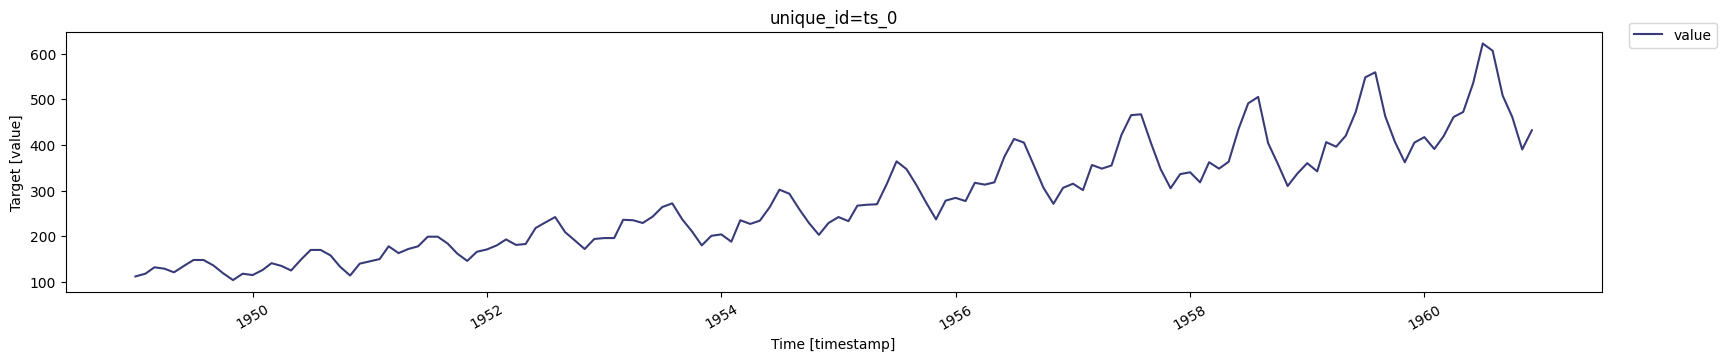

In [6]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

In [ ]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df,
    h=12,  # number of future time steps to predict
    freq='MS',   # frequency of the time series data, month start
    time_col='timestamp',
    target_col='value'
)
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.83792
1,1961-02-01,426.06274
2,1961-03-01,463.11655
3,1961-04-01,478.24450
4,1961-05-01,505.64648


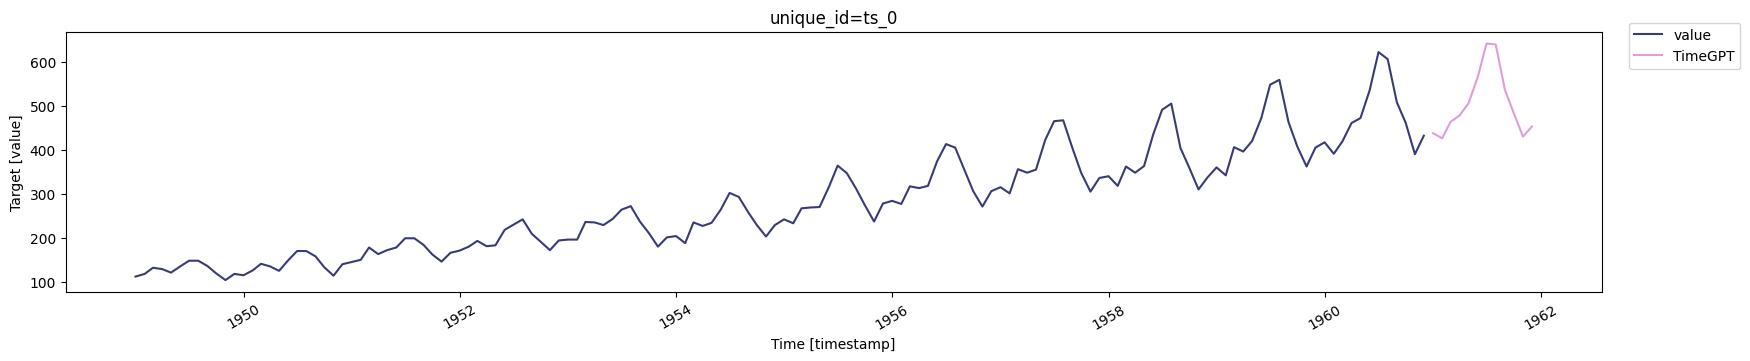

In [10]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

In [11]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df,
    h=36,
    freq='MS',
    time_col='timestamp',
    target_col='value',
    model='timegpt-1-long-horizon'
)
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,436.84340
1,1961-02-01,419.35153
2,1961-03-01,458.94315
3,1961-04-01,477.87607
4,1961-05-01,505.65692


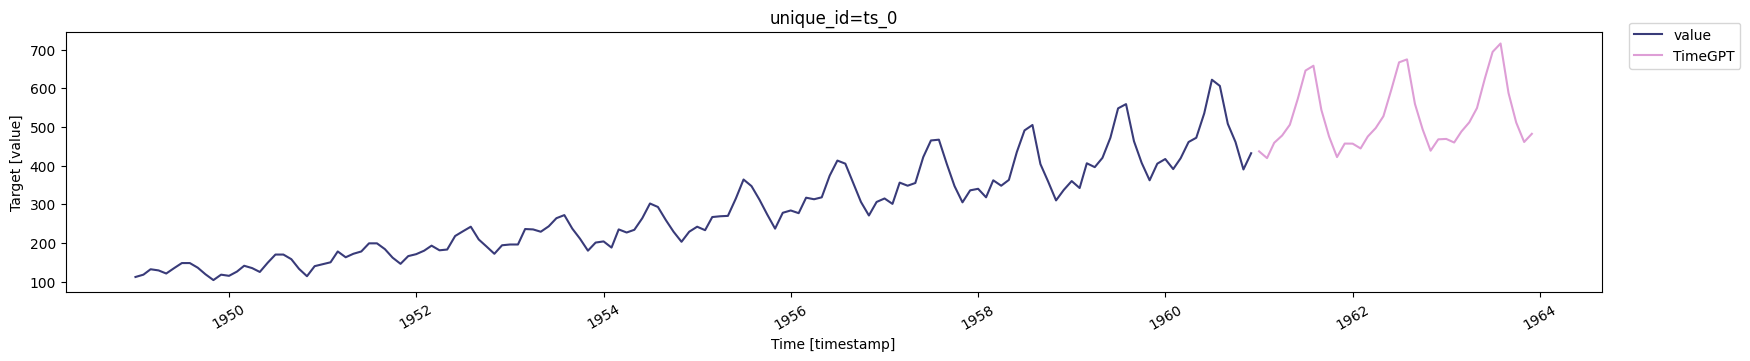

In [12]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

## IoT dataset